In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-reviews-nlp-project/Malaysia_Restaurants_Reviews.csv


In [5]:
pip install wordcloud contractions nltk beautifulsoup4


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install spellchecker


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 37.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 79.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 83.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.5 MB/s eta 0:00:00
     ━━━━

In [9]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import contractions
from spellchecker import SpellChecker
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

In [11]:
# Download the stopwords from NLTK
import nltk
nltk.download('stopwords') # stopwords: This dataset contains a list of common stop words in various languages.
nltk.download('punkt_tab') # punkt: This dataset is used for tokenization, which breaks text into words or sentences.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Read the combined CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/restaurant-reviews-nlp-project/Malaysia_Restaurants_Reviews.csv')

# Display the first few rows of the DataFrame
print(df.head())

                             Author  \
0  AgentcikayKuala Lumpur, Malaysia   
1                     Merlinong2979   
2                          Hwathy09   
3                      EskandarShah   
4                        dumbaacs88   

                                              Title  \
0       Fantastic International Cuisine at Cuisines   
1                           Heng Dai Cuti Cuti Ipoh   
2  Great service.Wonderful candlelight dinner meal.   
3                         Saturday buffet bbq grill   
4                       Perfect Candle Light Dinner   

                                              Review  Rating  \
0  Dinner here at Cuisines Restaurant was good. T...     5.0   
1  Like the environment so much, we stay in block...     5.0   
2  Had such a great candlelight 4 course meal in ...     4.0   
3  Totally disappointed with the buffet spread wh...     2.0   
4  It’s was a wonderful experience. The 4 course ...     5.0   

                        Dates           Restauran

In [13]:
# Create a new DataFrame with the top 500 records
df_small = df.head(500)

# Display the first few rows of the new DataFrame
print(df_small.head())

                             Author  \
0  AgentcikayKuala Lumpur, Malaysia   
1                     Merlinong2979   
2                          Hwathy09   
3                      EskandarShah   
4                        dumbaacs88   

                                              Title  \
0       Fantastic International Cuisine at Cuisines   
1                           Heng Dai Cuti Cuti Ipoh   
2  Great service.Wonderful candlelight dinner meal.   
3                         Saturday buffet bbq grill   
4                       Perfect Candle Light Dinner   

                                              Review  Rating  \
0  Dinner here at Cuisines Restaurant was good. T...     5.0   
1  Like the environment so much, we stay in block...     5.0   
2  Had such a great candlelight 4 course meal in ...     4.0   
3  Totally disappointed with the buffet spread wh...     2.0   
4  It’s was a wonderful experience. The 4 course ...     5.0   

                        Dates           Restauran

In [14]:
df_small.columns

Index(['Author', 'Title', 'Review', 'Rating', 'Dates', 'Restaurant'], dtype='object')

In [15]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating in [4, 5]:
        return '3'
    elif rating == 3:
        return '2'
    elif rating in [1, 2]:
        return '1'
    else:
        return 'unknown'  # In case there are unexpected values

# Apply the function to create the new column
df_small['Sentiment'] = df_small['Rating'].apply(categorize_rating)

/tmp/ipykernel_13/1695908890.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['Sentiment'] = df_small['Rating'].apply(categorize_rating)


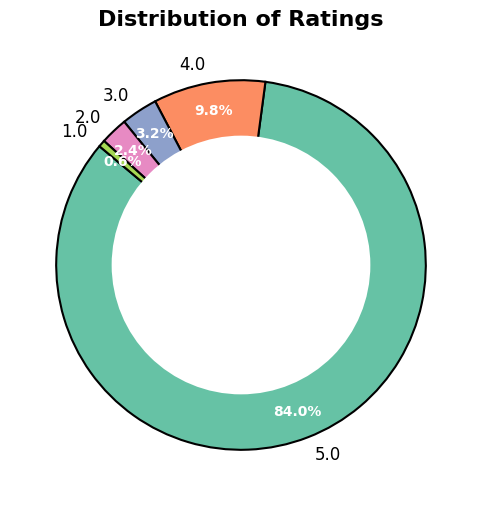

In [16]:
# Plotting Pie Chart for Ratings
rating_counts = df_small['Rating'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 6))

# Plotting a donut chart
wedges, texts, autotexts = plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
    pctdistance=0.85
)

# Add a circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Improve text appearance
for text in texts:
    text.set_color('black')
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

# Add a shadow effect
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Distribution of Ratings', fontsize=16, weight='bold')
plt.show()

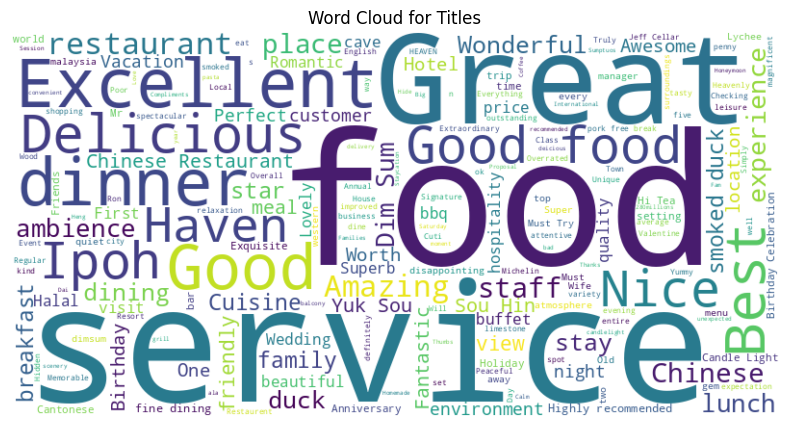

In [17]:
# Combine all titles into a single string
text = ' '.join(df_small['Title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

In [18]:
# Drop the specified columns
df_small = df_small.drop(columns=['Author', 'Dates', 'Rating', 'Title', 'Restaurant'])

In [19]:
df_small.columns

Index(['Review', 'Sentiment'], dtype='object')

#### Basic Preprocessing Steps

Lowercasing:
Convert all text to lowercase to ensure uniformity and avoid treating the same word in different cases as different.

Removing Punctuation:
Strip out punctuation marks which may not be relevant to the analysis.

Removing Numbers:
Remove numbers if they are not relevant to the text analysis.

Removing Extra Spaces:
Remove any extra spaces or multiple spaces between words.

Tokenization:
Split the text into individual words or tokens.

Stopword Removal:
Remove common words (e.g., "the", "and", "is") that may not contribute significant meaning to the text.

Removing Special Characters:
Eliminate special characters like @, #, or URLs, unless they are relevant to the analysis.

In [20]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").text
    
    # Lowercasing
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[@#]', '', text)  # Remove special characters like @ and #
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = word_tokenize(text)

    # Remove words with any letter repeating more than 3 times
    tokens = [word for word in tokens if not any(word.count(char) > 3 for char in set(word))]
    
    # Stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Review' column
df_small['Review'] = df_small['Review'].apply(preprocess_text)

/tmp/ipykernel_13/3450314349.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").text


In [21]:
df['Review'][0]

'Dinner here at Cuisines Restaurant was good. The dishes were well cooked, and whilst flavourful were low is sodium. Apparently no MSG is used in the cooking which is great especially for children. We had an excellent Ipoh Curry Noodles, Thai beef salad served with Miang Kham - Wild Betel Leaf Wrap and Hainanese Chicken rice on the Asian menu which was thoroughly delicious.\xa0From the Western menu, the Fish and Chips left a lasting impression - the batter was nice and crispy and the fish succulent.\xa0In the mornings, we had the buffet breakfast at Cuisines again - no complaints what so ever and our kiddo loved the eggs made sunny side up!\xa0The service personal we charming, well mannered and efficient. All in all a great time for the family!Show less'

#### Intermediate Preprocessing Steps
Stemming:
Reduce words to their base or root form (e.g., "running" to "run"). Tools like NLTK’s PorterStemmer or LancasterStemmer can be used.

Lemmatization:
Convert words to their base or dictionary form using context (e.g., "better" to "good"). This is usually more accurate than stemming and uses tools like WordNet in NLTK or spaCy.

Normalization:
Normalize text by expanding contractions (e.g., "don't" to "do not") or handling synonyms.

Correcting Spelling Errors:
Use spell checkers or correction algorithms to fix typos and misspellings.

In [22]:
from spellchecker import SpellChecker

# Initialize the SpellChecker
spell = SpellChecker()

# Function to apply contraction and spell check
def expand_and_correct(text):
    # Expand contractions
    text = contractions.fix(text)
    
    # Split the text into words
    words = text.split()
    
    # Correct spelling
    corrected_words = [spell.correction(word) or word for word in words]  # Use original word if correction is None
    
    # Join words back into a single string
    return ' '.join(corrected_words)

# Apply the function to the 'Review' column
df_small['Review'] = df_small['Review'].apply(expand_and_correct)

# Display the processed 'Review' column
print(df_small['Review'][0])

dinner cuisines restaurant good dishes well cooked whilst flavorful low sodium apparently message used cooking great especially children excellent oh curry noodles that beef salad served kiang ham wild betel leaf wrap hainanese chicken rice avian menu thoroughly delicious western menu fish chips left lasting impression batter nice crispy fish succulent mornings buffet breakfast cuisines complaints ever kiddo loved eggs made sunny side service personal charming well mannered efficient great time familyshow less


In [23]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.5 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize text using spaCy
def lemmatize_text_spacy(text):
    doc = nlp(text)
    # Lemmatize each token and join them back into a single string
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the 'Review' column
df_small['Review'] = df_small['Review'].apply(lemmatize_text_spacy)

df_small['Review'][0]     

'dinner cuisine restaurant good dish well cook whilst flavorful low sodium apparently message use cook great especially child excellent oh curry noodle that beef salad serve kiang ham wild betel leaf wrap hainanese chicken rice avian menu thoroughly delicious western menu fish chip leave last impression batter nice crispy fish succulent morning buffet breakfast cuisine complaint ever kiddo love egg make sunny side service personal charming well mannere efficient great time familyshow less'

#### Advanced Preprocessing Steps

Named Entity Recognition (NER):
Identify and extract entities like names, dates, or locations. This can be useful for entity extraction and further analysis.

Part-of-Speech Tagging:
Label words with their part of speech (e.g., noun, verb) to understand their role in sentences.

Text Segmentation:
Segment long text into smaller, meaningful chunks (e.g., sentences, paragraphs) for more detailed analysis.

Handling Negations:
Detect and handle negations to better understand sentiment (e.g., "not good" to "bad").

Text Vectorization:
Convert text into numerical features using methods like TF-IDF, word embeddings (Word2Vec, GloVe), or contextual embeddings (BERT).

Removing or Handling URLs and Mentions:
Depending on the task, you might want to either remove or process URLs and social media mentions (e.g., @username).

Sentence:
"Alice visited the Eiffel Tower in Paris."

#### Named Entity Recognition (NER):
What it does: NER identifies and classifies entities like people, places, organizations, dates, etc., in a sentence.

Explanation for the sentence:

"Alice" is recognized as a PERSON (a proper noun).

"Eiffel Tower" is recognized as a LOC (Location).

"Paris" is also recognized as a LOC (Location).

#### Part-of-Speech (POS) Tagging:
What it does: POS tagging assigns a grammatical category (like noun, verb, adjective) to each word in the sentence.

Explanation for the sentence:

"Alice" is tagged as a NNP (Proper noun, singular).

"visited" is tagged as a VBD (Verb, past tense).

"the" is tagged as a DT (Determiner).

"Eiffel Tower" is tagged as NNP (Proper noun, singular).

"in" is tagged as IN (Preposition).

"Paris" is tagged as NNP (Proper noun, singular).

#### Dependency Parsing:
What it does: Dependency parsing analyzes the grammatical structure of the sentence, showing how words relate to each other (like subject, object, modifiers).

Explanation for the sentence:

"visited" is the root verb.

"Alice" is the subject of the verb "visited."

"Eiffel Tower" is the direct object of "visited."

"in" is a preposition that links "visited" to "Paris."

"Paris" is the object of the preposition "in."

In [25]:
# Apply NER to the 'Review' column
def apply_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to the 'Review' column
df_small['Entities'] = df_small['Review'].apply(apply_ner)

# Display the resulting DataFrame
print(df_small[['Review', 'Entities']].head())

                                              Review  \
0  dinner cuisine restaurant good dish well cook ...   
1  like environment much stay block c n clean n h...   
2  great candlelight course meal place say one go...   
3  totally disappoint buffet spread limit term ch...   
4  wonderful course love menu nice tasty view lak...   

                                            Entities  
0  [(kiang ham wild, PERSON), (betel leaf wrap, O...  
1              [(n clean n huge living hall n, ORG)]  
2                                  [(one, CARDINAL)]  
3                                                 []  
4                                                 []  


In [26]:
# Apply POS tagging to the 'Review' column
def apply_pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply POS tagging to the 'Review' column
df_small['POS_Tags'] = df_small['Review'].apply(apply_pos_tagging)

df_small['POS_Tags']

0      [(dinner, NOUN), (cuisine, PROPN), (restaurant...
1      [(like, INTJ), (environment, NOUN), (much, ADV...
2      [(great, ADJ), (candlelight, NOUN), (course, N...
3      [(totally, ADV), (disappoint, VERB), (buffet, ...
4      [(wonderful, ADJ), (course, NOUN), (love, NOUN...
                             ...                        
495    [(great, ADJ), (food, NOUN), (unique, ADJ), (e...
496    [(ambience, NOUN), (amazing, ADJ), (food, NOUN...
497    [(food, NOUN), (service, NOUN), (excellent, AD...
498    [(travel, NOUN), (world, NOUN), (dine, VERB), ...
499    [(many, ADJ), (comment, NOUN), (amazing, ADJ),...
Name: POS_Tags, Length: 500, dtype: object

In [27]:
# Apply Dependency Parsing to the 'Review' column
def apply_dependency_parsing(text):
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

# Apply Dependency Parsing to the 'Review' column
df_small['Dependency_Parse'] = df_small['Review'].apply(apply_dependency_parsing)

df_small['Dependency_Parse']

0      [(dinner, nmod, restaurant), (cuisine, compoun...
1      [(like, prep, stay), (environment, pobj, like)...
2      [(great, amod, place), (candlelight, compound,...
3      [(totally, advmod, disappoint), (disappoint, R...
4      [(wonderful, amod, course), (course, compound,...
                             ...                        
495    [(great, amod, staff), (food, npadvmod, unique...
496    [(ambience, nmod, food), (amazing, amod, food)...
497    [(food, compound, service), (service, compound...
498    [(travel, compound, world), (world, nsubj, din...
499    [(many, amod, comment), (comment, nmod, cave),...
Name: Dependency_Parse, Length: 500, dtype: object

## Converting words to numbers

In [28]:
# TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the 'Review' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small['Review'])

# Convert to DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [29]:
# Bag of words

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the 'Review' column
count_matrix = count_vectorizer.fit_transform(df_small['Review'])

# Convert to DataFrame for better readability (optional)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [30]:
# Word2Vec

from gensim.models import Word2Vec

# Tokenize the 'Review' column
tokenized_reviews = df_small['Review'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(tokenized_reviews, vector_size=300, window=5, min_count=2)
#  The window parameter defines the maximum distance between the current word and the predicted word within a sentence.
#  The min_count parameter specifies the minimum frequency a word must have in the corpus to be included in the training.
# The workers parameter defines the number of CPU cores to use for training the model.


# Generate the word vectors for each review
df_small['Word2Vec'] = df_small['Review'].apply(lambda x: np.mean([w2v_model.wv[word] for word in x.split() if word in w2v_model.wv] or [np.zeros(300)], axis=0))

In [31]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-08-27 04:45:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-27 04:45:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-27 04:45:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [32]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [33]:
# Path to the GloVe file (choose the appropriate dimensions, e.g., 300d)
glove_file_path = 'glove.6B.300d.txt'

# Load GloVe vectors
glove_vectors = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

# Generate the GloVe vectors for each review
df_small['GloVe'] = df_small['Review'].apply(lambda x: np.mean([glove_vectors.get(word, np.zeros(300)) for word in x.split()], axis=0))

# Check the first few GloVe vectors
print(df_small['GloVe'].head())

0    [-0.034781306350527154, 0.11910624896520622, 0...
1    [-0.10321660641994741, 0.04177194663530422, -0...
2    [-0.07136641, 0.083591096, -0.017121857, -0.15...
3    [0.006204108949060793, 0.03362392606558623, 0....
4    [-0.17806221033650926, 0.001175455213808341, -...
Name: GloVe, dtype: object


In [34]:
# Google News 300 (Pre-trained Word2Vec)

import gensim.downloader as api

# Load pre-trained Google News Word2Vec model
google_news_vectors = api.load("word2vec-google-news-300")

# Generate the vectors for each review
df_small['GoogleNews300'] = df_small['Review'].apply(lambda x: np.mean([google_news_vectors[word] for word in x.split() if word in google_news_vectors] or [np.zeros(300)], axis=0))

df_small['GoogleNews300'].head()

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.3% 54.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.2% 86.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.1% 118.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.0% 150.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.9% 181.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.8% 213.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.7% 245.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 276.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.5% 308.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.7% 360.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.6% 409.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.2% 452.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.8% 495.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.6% 542.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.1% 583.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.4% 638.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.4% 671.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.1% 732.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.2% 785.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.1% 815.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.8% 878.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 56.0% 931.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.0% 965.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.7% 1025.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.2% 1084.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.0% 1114.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.6% 1173.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.2% 1234.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.3% 1268.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.7% 1326.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.9% 1362.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.3% 1418.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.8% 1460.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.0% 1513.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.1% 1564.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.1% 1614.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.0% 1646.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0    [-0.06296528, 0.049362626, 0.014626986, 0.1622...
1    [0.03904121, 0.030052362, 0.003147214, 0.10904...
2    [-0.067210875, 0.053275153, 0.025302794, 0.135...
3    [-0.020459395, 0.030485006, 0.021707388, 0.120...
4    [-0.042407133, 0.045664977, -0.025025558, 0.16...
Name: GoogleNews300, dtype: object

In [35]:
df_small.head(1)

,Review,Sentiment,Entities,POS_Tags,Dependency_Parse,Word2Vec,GloVe,GoogleNews300
0,dinner cuisine restaurant good dish well cook ...,3,"[(kiang ham wild, PERSON), (betel leaf wrap, O...","[(dinner, NOUN), (cuisine, PROPN), (restaurant...","[(dinner, nmod, restaurant), (cuisine, compoun...","[-0.008574814, 0.14609642, 0.023586469, 0.1004...","[-0.034781306350527154, 0.11910624896520622, 0...","[-0.06296528, 0.049362626, 0.014626986, 0.1622..."


## Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [40]:
# Assuming 'Word2Vec' and 'Sentiment' columns exist in df_small
# Convert the Word2Vec column to numpy arrays for training
X = np.array(df_small['Word2Vec'].tolist())
y = df_small['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train models
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predictions on the test set
rf_pred = rf_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Classification reports
rf_report = classification_report(y_test, rf_pred)
svc_report = classification_report(y_test, svc_pred)
lr_report = classification_report(y_test, lr_pred)

# Training accuracies
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
svc_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))

# Test accuracies
rf_test_acc = accuracy_score(y_test, rf_pred)
svc_test_acc = accuracy_score(y_test, svc_pred)
lr_test_acc = accuracy_score(y_test, lr_pred)

# Displaying the results

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2f}, Test Accuracy: {rf_test_acc:.2f}")
print("Classification Report (Random Forest):")
print(rf_report)

print(f"\nSVM - Training Accuracy: {svc_train_acc:.2f}, Test Accuracy: {svc_test_acc:.2f}")
print("Classification Report (SVM):")
print(svc_report)

print(f"\nLogistic Regression - Training Accuracy: {lr_train_acc:.2f}, Test Accuracy: {lr_test_acc:.2f}")
print("Classification Report (Logistic Regression):")
print(lr_report)

Random Forest - Training Accuracy: 1.00, Test Accuracy: 0.97
Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           3       0.97      1.00      0.98        97

    accuracy                           0.97       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.94      0.97      0.96       100


SVM - Training Accuracy: 0.93, Test Accuracy: 0.97
Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           3       0.97      1.00      0.98        97

    accuracy                           0.97       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.94      0.97      0.96       100


Logistic Regression - Training Accuracy: 0.93, Test Accuracy: 0.97
Classification Report (Logistic Regression):
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/m